In [2]:
from google.colab import files
files.upload(r'C:\Users\A20405224099\Downloads\archive.zip')

Saving patients.csv to C:\Users\A20405224099\Downloads\archive.zip/patients.csv


{'C:\\Users\\A20405224099\\Downloads\\archive.zip/patients.csv': b'patient_id,name,age,arrival_date,departure_date,service,satisfaction\nPAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61\nPAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83\nPAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83\nPAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81\nPAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76\nPAT-f4b29bae,Diana May,83,2025-06-26,2025-06-30,emergency,81\nPAT-283cda07,William Herrera,62,2025-12-26,2025-12-27,emergency,66\nPAT-5b61868c,Ashley Waller,0,2025-05-21,2025-06-04,ICU,82\nPAT-f9c8afa6,Victor Baker,50,2025-07-30,2025-08-13,general_medicine,91\nPAT-5290be70,Jeffrey Chandler,29,2025-11-01,2025-11-14,emergency,88\nPAT-003ce690,Larry Dixon,29,2025-01-19,2025-01-21,ICU,60\nPAT-18f78014,Kenneth Scott,77,2025-06-24,2025-06-26,general_medicine,61\nPAT-69dc0dc1,April Frost,37,2025-11-15,2025-11-19,general_medicine,60\nP

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
# The file was saved with the full path string as its name during upload
df = pd.read_csv(r'C:\Users\A20405224099\Downloads\archive.zip/patients.csv')
df.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [30]:
df.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


Text(0, 0.5, 'satisfaction')

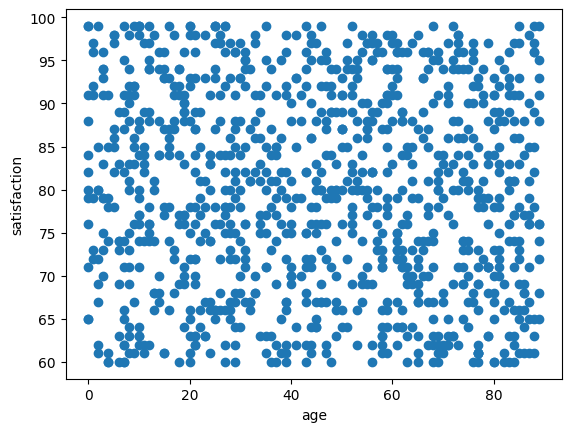

In [31]:
plt.scatter(df['age'],df['satisfaction'])
plt.xlabel('age')
plt.ylabel('satisfaction')

In [45]:
X = df.iloc[:,2:3]
y = df.iloc[:,-1]

In [46]:
print(X)

     age
0     24
1      6
2     24
3     32
4     25
..   ...
995   26
996   89
997   72
998   47
999   64

[1000 rows x 1 columns]


In [51]:
print(y)

0      61
1      83
2      83
3      81
4      76
       ..
995    91
996    99
997    69
998    61
999    83
Name: satisfaction, Length: 1000, dtype: int64


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
X_test

,age
37,33
726,24
846,5
295,68
924,18
...,...
839,39
810,11
930,39
616,44


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
X_test

,age
37,33
726,24
846,5
295,68
924,18
...,...
839,39
810,11
930,39
616,44


In [60]:
y_test

,satisfaction
37,97
726,91
846,85
295,67
924,94
...,...
839,98
810,89
930,75
616,86


In [61]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79.63129834])

Text(0, 0.5, 'satisfaction')

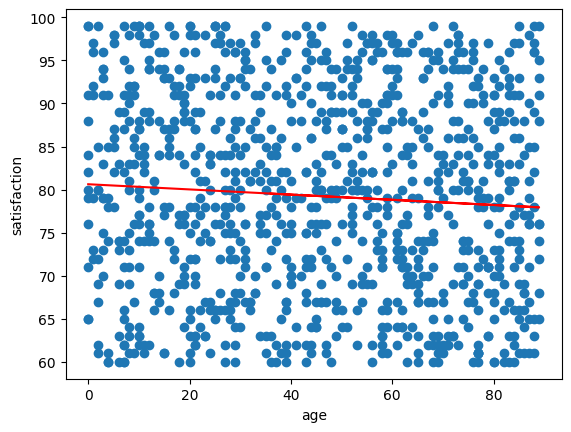

In [62]:
plt.scatter(df['age'],df['satisfaction'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('age')
plt.ylabel('satisfaction')

In [63]:
m = lr.coef_
m

array([-0.03010321])

In [65]:
b = lr.intercept_
b

np.float64(80.62470419044924)

In [66]:
m * 35 + b

array([79.57109192])

In [67]:
m * 58 + b

array([78.87871815])

In [85]:
class MeraLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):
        # Convert pandas objects to numpy arrays for easier indexing in loops
        x = X_train.values.ravel()
        y = y_train.values.ravel()

        num = 0
        den = 0

        x_mean = x.mean()
        y_mean = y.mean()

        for i in range(x.shape[0]):
            num = num + ((x[i] - x_mean)*(y[i] - y_mean))
            den = den + ((x[i] - x_mean)*(x[i] - x_mean))

        self.m = num/den
        self.b = y_mean - (self.m * x_mean)
        print(f'Slope (m): {self.m}')
        print(f'Intercept (b): {self.b}')

    def predict(self,X_test):
        return self.m * X_test + self.b

In [93]:
X_train.shape

(800, 1)

In [94]:
lr = MeraLR()

In [95]:
X_train.shape[0]

800

In [96]:
X_train.iloc[0]

,175
age,0


In [97]:
X_train.mean()

,0
age,45.45875


In [98]:
X_test.iloc[0]

,37
age,33


In [99]:
# The error is now resolved by the updated class definition above.
# We call fit to calculate m and b, then predict for the first test sample.
lr.fit(X_train, y_train)
print(lr.predict(X_test.iloc[0]))

Slope (m): -0.03010320764317626
Intercept (b): 80.62470419044924
age    79.631298
Name: 37, dtype: float64
